In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
import glob
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
#xgbootst

#Can lag more variables to improve ie shift more
#Rolling moving averages
#Other text ideas
#LSTM

In [2]:
file_list = glob.glob("stock_comment_count/*.csv")


AAPL
Avg error -> $5.6
Avg error percent -> 4.34%


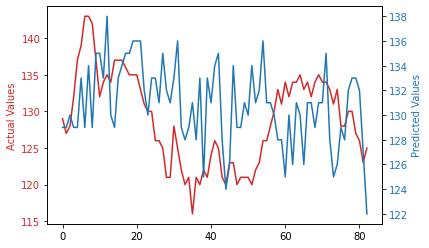

AMC
Avg error -> $2.73
Avg error percent -> 30.25%


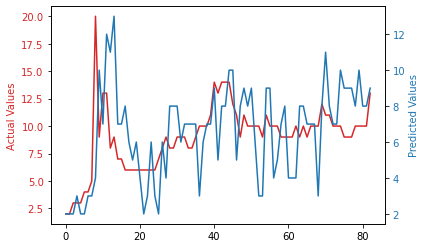

BB
Avg error -> $1.6
Avg error percent -> 14.97%


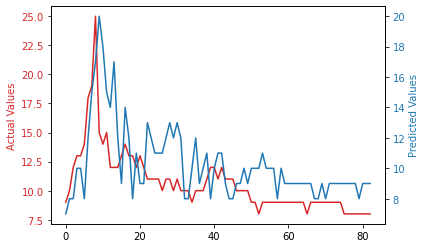

GME
Avg error -> $62.67
Avg error percent -> 43.59%


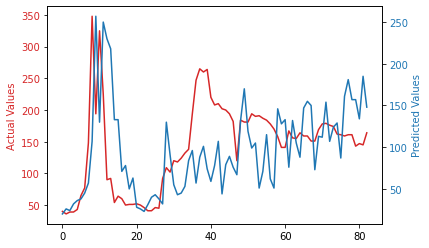

KODK
Avg error -> $0.82
Avg error percent -> 9.6%


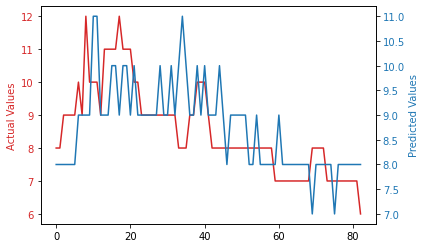

In [3]:
for file in file_list:
    stock_data = pd.read_csv(file)
    ticker = str(file.replace("stock_comment_count\\", "").replace(".csv", ""))

    #Fit model + Shift
    stock_data['Volume'] = stock_data['Volume'].shift(1)
    stock_data['volume_change'] = stock_data['volume_change'].shift(1)
    stock_data['stock_change'] = stock_data['stock_change'].shift(1)
    stock_data['comment_volume'] = stock_data['comment_volume'].shift(1)
    stock_data['polarity_avg'] = stock_data['polarity_avg'].shift(1)
    stock_data['subjectivity_avg'] = stock_data['subjectivity_avg'].shift(1)
    stock_data = stock_data.dropna()
    
    X = stock_data[["Volume", "volume_change", "stock_change", "comment_volume", "polarity_avg", "subjectivity_avg"]]
    y = stock_data["Close"].values.reshape(-1, 1)
    
    model = RandomForestRegressor()
    
    predicted = []
    actual = []
    for i in range(7,90):
        X_train = X.iloc[:i]
        y_train = y[:i]

        model.fit(X_train, y_train)

        pred = model.predict([X.iloc[i]])

        #compare pred to y i

        predicted.append(round(float(str(pred).replace("[", "").replace("]", ""))))
        actual.append(round(float(str(y[i]).replace("[", "").replace("]", ""))))


    columns = ["Predicted", "Actual"]
    #Add all lists scraped to dataframe
    pred_vs_actual = pd.DataFrame(list(zip(predicted, actual)), columns = columns)
    pred_vs_actual["Error"] = ''
    
    
    for x in range(len(pred_vs_actual)):
        pred_vs_actual["Error"].iat[x] = abs(pred_vs_actual["Predicted"].iat[x] -  pred_vs_actual["Actual"].iat[x])

    avg_error = round(pred_vs_actual["Error"].mean(), 2)
    
    
    print(ticker)
    print(f"Avg error -> ${avg_error}")
    avg_stock_price = pred_vs_actual["Actual"].mean()
    avg_perc_err = round((avg_error/avg_stock_price)*100, 2)
    print(f"Avg error percent -> {avg_perc_err}%")
    
    # Create some mock data
    predicted_values = pred_vs_actual['Predicted']
    actual_values = pred_vs_actual['Actual']

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    #ax1.set_xlabel('time (s)')
    ax1.set_ylabel("Actual Values", color=color)
    ax1.plot(actual_values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Predicted Values', color=color)  # we already handled the x-label with ax1
    ax2.plot(predicted_values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

      # otherwise the right y-label is slightly clipped
    plt.show()
    

          
        

